<hr>

### Корреляционный анализ для рек.систем (когда надо сделать просто и быстро)

In [ ]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt


df = pd.read_csv("ratings.csv")
movie_titles = pd.read_csv('movies_titles.csv')
df['item_id'] = df['movieId']
df = df.drop('movieId', axis = 1)

movielens = pd.merge(df, movie_titles, on='item_id')

movielens.head(5)

userId  rating   timestamp  item_id                title
0       1     2.5  1260759144       31  Crimson Tide (1995)
1       7     3.0   851868750       31  Crimson Tide (1995)
2      31     4.0  1273541953       31  Crimson Tide (1995)
3      32     4.0   834828440       31  Crimson Tide (1995)
4      36     3.0   847057202       31  Crimson Tide (1995)

In [ ]:
# Средний рейтинг фильмов
movielens.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Promise, The (Versprechen, Das) (1994)    5.0
Fair Game (1995)                          5.0
Pompatus of Love, The (1996)              5.0
Love Jones (1997)                         5.0
That Thing You Do! (1996)                 5.0
Name: rating, dtype: float64

In [ ]:
# Кол-во рейтингов на фильм
movielens.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Client, The (1994)         341
Promesse, La (1996)        324
Schindler's List (1993)    311
Stalingrad (1993)          304
Event Horizon (1997)       291
Name: rating, dtype: int64

In [ ]:
# создадим набор данных с колонками: рейтинг / кол-во рейтингов с данной оценкой
ratings = pd.DataFrame(movielens.groupby('title')['rating'].mean())

ratings['num of ratings'] = pd.DataFrame(movielens.groupby('title')['rating'].count())

ratings.head()

rating  num of ratings
title                                              
'Til There Was You (1997)  4.052632              19
1-900 (1994)               2.961538              13
101 Dalmatians (1996)      3.173077              52
12 Angry Men (1957)        4.700000               5
187 (1997)                 2.700000              10

<AxesSubplot:title={'center':'Number of ratings'}>

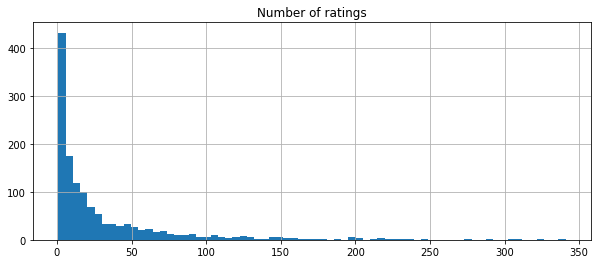

In [ ]:
# визуализация по  кол-ву рейтингов
plt.figure(figsize =(10, 4))
plt.title("Number of ratings")
ratings['num of ratings'].hist(bins = 70)

<AxesSubplot:title={'center':'Ratings'}>

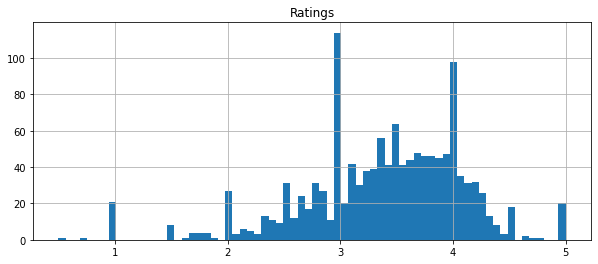

In [ ]:
# визуализация по размеру рейтинга
plt.figure(figsize =(10, 4))
plt.title("Ratings")
ratings['rating'].hist(bins = 70)

In [ ]:
# Сортируем по кол-ву рейтингов на фильм
moviemat = movielens.pivot_table(index ='userId', columns ='title', values ='rating')
ratings.sort_values('num of ratings', ascending = False).head(10)

rating  num of ratings
title                                                             
Client, The (1994)                        4.054252             341
Promesse, La (1996)                       4.256173             324
Schindler's List (1993)                   4.487138             311
Stalingrad (1993)                         4.138158             304
Event Horizon (1997)                      4.221649             291
North by Northwest (1959)                 3.706204             274
Toy Story (1995)                          3.872470             247
Gandhi (1982)                             4.303279             244
Wild Bunch, The (1969)                    4.006329             237
Savage Nights (Nuits fauves, Les) (1992)  4.232906             234

In [ ]:
# корреляция между фильмами
starwars_user_ratings = moviemat['Star Wars (1977)']
# liarliar_user_ratings = moviemat['Liar Liar (1997)']

# применим метод расчета корреляции
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
# similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)


corr_starwars = pd.DataFrame(similar_to_starwars, columns =['Correlation'])
corr_starwars.dropna(inplace = True)

corr_starwars.head()

C:\Users\ArtSe\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\lib\function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\ArtSe\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Correlation
title                                   
'Til There Was You (1997)       0.183447
1-900 (1994)                    0.074605
101 Dalmatians (1996)           0.179888
187 (1997)                      0.842701
2 Days in the Valley (1996)    -0.500000

In [ ]:
# поиск похожих фильмов на Star Wars (1977)
corr_starwars.sort_values('Correlation', ascending = False).head(10)
corr_starwars = corr_starwars.join(ratings['num of ratings'])

corr_starwars.head()

# сделаем отбор популярных
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation', ascending = False).head()

Correlation  num of ratings
title                                                                
Star Wars (1977)                             1.000000             201
Mortal Kombat (1995)                         0.558721             146
Savage Nights (Nuits fauves, Les) (1992)     0.392853             234
Virtuosity (1995)                            0.369193             217
Sling Blade (1996)                           0.341309             109